In [233]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [234]:
bank = pd.read_csv("bank-full.csv",sep=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [235]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyzing data

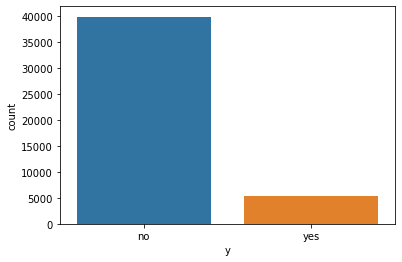

In [236]:
sb.countplot(x='y',data=bank)

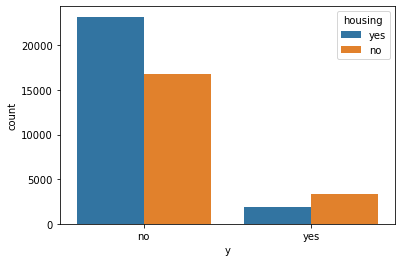

In [237]:
sb.countplot(x='y',hue='housing',data=bank)

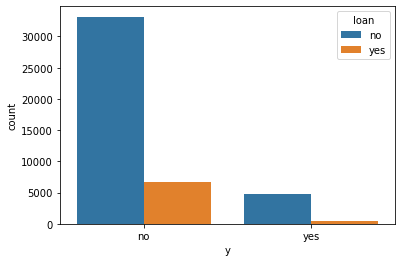

In [238]:
sb.countplot(x='y',hue='loan',data=bank)

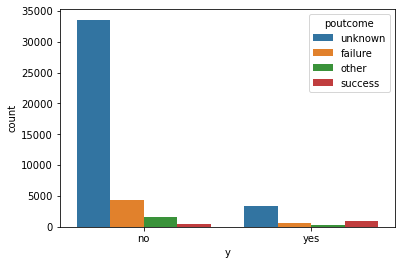

In [239]:
sb.countplot(x='y',hue='poutcome',data=bank)

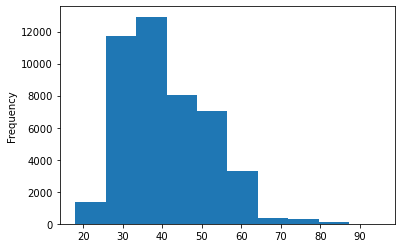

In [240]:
bank["age"].plot.hist()

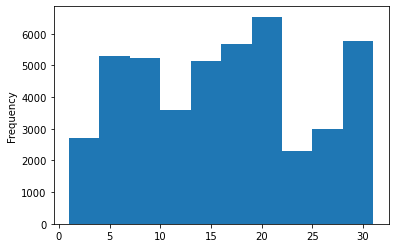

In [241]:
bank["day"].plot.hist()

In [242]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Cleaning

In [243]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [244]:
bank.drop(["job","contact","month","education","poutcome","day"],axis=1,inplace=True)

In [245]:
bank.head(3)

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,no,2143,yes,no,261,1,-1,0,no
1,44,single,no,29,yes,no,151,1,-1,0,no
2,33,married,no,2,yes,yes,76,1,-1,0,no


In [246]:
status = pd.get_dummies(bank['marital'],drop_first=True)
status

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45206,1,0
45207,0,0
45208,1,0
45209,1,0


In [247]:
d_fault = pd.get_dummies(bank['default'],drop_first=True)
d_fault

,yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,0
45207,0
45208,0
45209,0


In [248]:
Housing = pd.get_dummies(bank['housing'],drop_first=True)
Housing

,yes
0,1
1,1
2,1
3,1
4,0
...,...
45206,0
45207,0
45208,0
45209,0


In [249]:
Loan = pd.get_dummies(bank['loan'],drop_first=True)
Loan

,yes
0,0
1,0
2,1
3,0
4,0
...,...
45206,0
45207,0
45208,0
45209,0


In [250]:
bank = pd.concat([bank,status,d_fault,Housing,Loan,deposit],axis=1)
bank.head(5)

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,y,married,single,yes,yes,yes,yes
0,58,married,no,2143,yes,no,261,1,-1,0,no,1,0,0,1,0,0
1,44,single,no,29,yes,no,151,1,-1,0,no,0,1,0,1,0,0
2,33,married,no,2,yes,yes,76,1,-1,0,no,1,0,0,1,1,0
3,47,married,no,1506,yes,no,92,1,-1,0,no,1,0,0,1,0,0
4,33,single,no,1,no,no,198,1,-1,0,no,0,1,0,0,0,0


In [251]:
bank.drop(['marital','default','housing','loan'],axis=1,inplace = True)


In [252]:
bank

,age,balance,duration,campaign,pdays,previous,y,married,single,yes,yes,yes,yes
0,58,2143,261,1,-1,0,no,1,0,0,1,0,0
1,44,29,151,1,-1,0,no,0,1,0,1,0,0
2,33,2,76,1,-1,0,no,1,0,0,1,1,0
3,47,1506,92,1,-1,0,no,1,0,0,1,0,0
4,33,1,198,1,-1,0,no,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,yes,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,yes,1,0,0,0,0,1
45209,57,668,508,4,-1,0,no,1,0,0,0,0,0


In [253]:
bank_new= bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new

,age,balance,duration,campaign,pdays,previous,y,married,single,yes,yes,yes,yes
0,58,2143,261,1,-1,0,0,1,0,0,1,0,0
1,44,29,151,1,-1,0,0,0,1,0,1,0,0
2,33,2,76,1,-1,0,0,1,0,0,1,1,0
3,47,1506,92,1,-1,0,0,1,0,0,1,0,0
4,33,1,198,1,-1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,1,0,0,0,0,1
45209,57,668,508,4,-1,0,0,1,0,0,0,0,0


## Train and Test data

In [254]:
x = bank_new.drop("y",axis=1)
y = bank_new["y"]

In [255]:
from sklearn.model_selection import train_test_split 

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
logmodel = LogisticRegression()

In [259]:
logmodel.fit(x_train,y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [260]:
pred = logmodel.predict(x_test)

In [261]:
from sklearn.metrics import classification_report

In [263]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99     12013\n           1       0.99      0.91      0.95      1551\n\n    accuracy                           0.99     13564\n   macro avg       0.99      0.95      0.97     13564\nweighted avg       0.99      0.99      0.99     13564\n'

In [264]:
from sklearn.metrics import confusion_matrix

In [265]:
confusion_matrix(y_test,pred)

array([[12005,     8],
       [  142,  1409]], dtype=int64)

In [266]:
from sklearn.metrics import accuracy_score

In [267]:
##Checking accuracy score
accuracy_score(y_test,pred)

0.9889413152462401